In [ ]:
import pandas as pd 
import numpy as np 
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
np.random.seed(123)
import statsmodels

## Read all or one by one data frame

In [ ]:
#df = pd.concat([pd.read_csv(f, encoding='latin1',delimiter=';') for f in glob.glob('GermanSolarFarm/data/*.csv')], ignore_index=True)
df=pd.read_csv('GermanSolarFarm/data/pv_01.csv',delimiter=';')

In [ ]:
df.columns ;

In [ ]:
type(df)

In [5]:
Data1=df.drop('Unnamed: 51', axis=1)

In [6]:
Data1.head(5)

,time_idx,hour_of_day,hour_of_day_cos,hour_of_day_sin,month_of_year,month_of_year_cos,month_of_year_sin,season_of_year,season_of_year_cos,season_of_year_sin,...,LowerWindDirection,LowerWindDirectionMath,LowerWindDirectionCos,LowerWindDirectionSin,UpperWindSpeed,UpperWindDirection,UpperWindDirectionMath,UpperWindDirectionCos,UpperWindDirectionSin,power_normed
0,1.0,0.000000,1.000000,0.000000,0.909091,0.017332,0.258819,1.0,0.0,0.0,...,0.558633,0.190752,0.681740,0.965801,0.359087,0.577455,0.172559,0.733785,0.941978,0.000000
1,2.0,0.142857,0.957824,0.399332,0.909091,0.017332,0.258819,1.0,0.0,0.0,...,0.531501,0.217852,0.600192,0.989859,0.475393,0.545543,0.204424,0.641217,0.979643,0.000000
2,3.0,0.285714,0.838278,0.732544,0.909091,0.017332,0.258819,1.0,0.0,0.0,...,0.623444,0.126020,0.851167,0.855924,0.472248,0.635529,0.114573,0.875928,0.829663,0.000000
3,4.0,0.428571,0.661157,0.944463,0.909091,0.017332,0.258819,1.0,0.0,0.0,...,0.669254,0.080266,0.937664,0.741765,0.591015,0.673493,0.076666,0.943093,0.731664,0.035185
4,5.0,0.571429,0.455788,1.000000,0.909091,0.017332,0.258819,1.0,0.0,0.0,...,0.698923,0.050633,0.974850,0.656581,0.641152,0.701128,0.049073,0.976413,0.651756,0.120988


In [7]:
Data1.shape

(6217, 51)

In [8]:
Data1.describe()

,time_idx,hour_of_day,hour_of_day_cos,hour_of_day_sin,month_of_year,month_of_year_cos,month_of_year_sin,season_of_year,season_of_year_cos,season_of_year_sin,...,LowerWindDirection,LowerWindDirectionMath,LowerWindDirectionCos,LowerWindDirectionSin,UpperWindSpeed,UpperWindDirection,UpperWindDirectionMath,UpperWindDirectionCos,UpperWindDirectionSin,power_normed
count,6217.000000,6217.000000,6217.000000,6217.000000,6217.000000,6217.000000,6217.000000,6217.000000,6217.000000,6217.000000,...,6217.000000,6217.000000,6217.000000,6217.000000,6217.000000,6217.000000,6217.000000,6217.000000,6217.000000,6217.000000
mean,3109.000000,0.499920,0.533149,0.608563,0.544548,0.420717,0.600220,0.548603,0.394155,0.554595,...,0.564245,0.403288,0.628539,0.608671,0.343724,0.573815,0.411037,0.640362,0.597398,0.109715
std,1794.837644,0.327388,0.365148,0.333564,0.320168,0.358962,0.334571,0.378155,0.385151,0.391409,...,0.230603,0.322571,0.362625,0.300345,0.153723,0.232721,0.328869,0.360847,0.301061,0.178543
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1555.000000,0.142857,0.256176,0.270427,0.272727,0.068148,0.258819,0.333333,0.000000,0.000000,...,0.387985,0.120118,0.290335,0.378777,0.237028,0.398749,0.118401,0.322074,0.366889,0.000000
50%,3109.000000,0.428571,0.661157,0.632563,0.545455,0.377014,0.707107,0.666667,0.171573,0.707107,...,0.611767,0.292992,0.772748,0.652867,0.331004,0.624248,0.317959,0.790428,0.644975,0.008025
75%,4663.000000,0.714286,0.957824,0.889960,0.818182,0.762999,0.866025,1.000000,0.585786,0.707107,...,0.731942,0.646943,0.949839,0.881010,0.436570,0.740582,0.704234,0.953910,0.862743,0.148354
max,6217.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.834568


## Check if there is a null data 

In [9]:
Data1.isnull().sum(); 

In [10]:
len(Data1.columns)

51

## Preparing Data For Linear Regression

#### Linear Assumption:  You may need to transform data to make the relationship linear (e.g. log transform for an exponential relationship)

## Exploratory Data Analysis

In [11]:
import seaborn as sns 

%matplotlib inline
sns.set(rc={'figure.figsize':(15,12)})
#sns.distplot(Data1['power_normed'], bins=50)
#sns.pairplot(Data1)
plt.show()

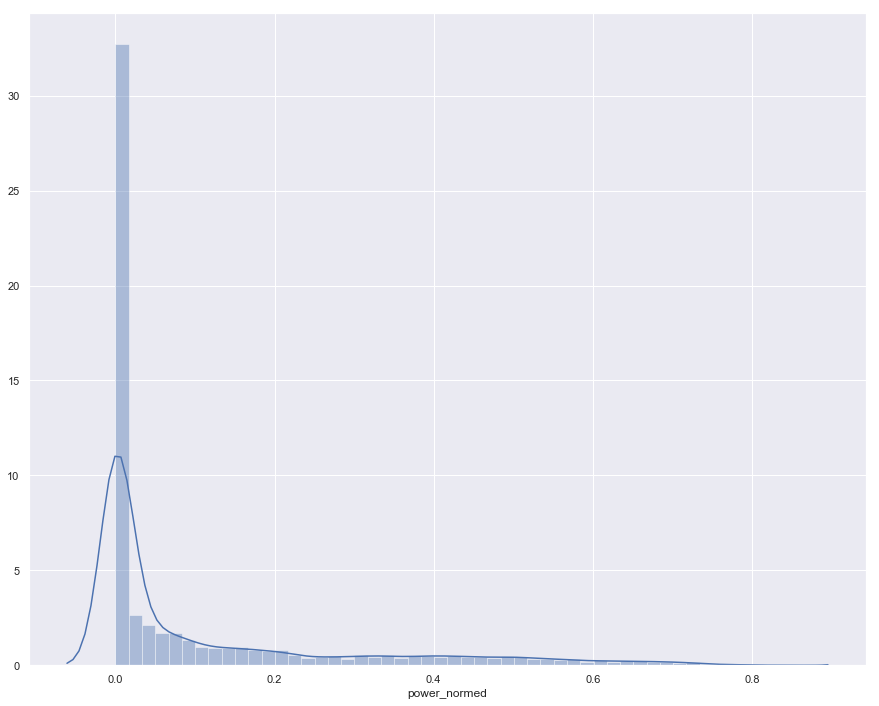

In [12]:
sns.distplot(Data1['power_normed'])

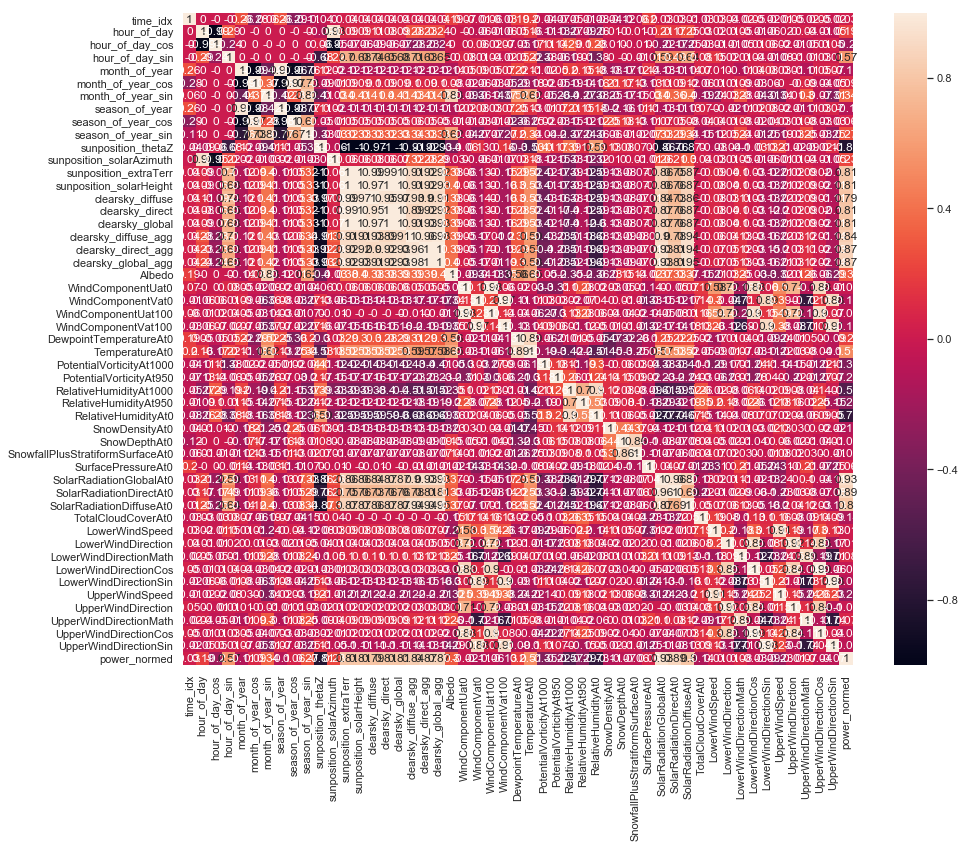

In [13]:
corr = Data1.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=corr, annot=True)

In [14]:
Data1.columns ;

In [15]:
Data1.tail()

,time_idx,hour_of_day,hour_of_day_cos,hour_of_day_sin,month_of_year,month_of_year_cos,month_of_year_sin,season_of_year,season_of_year_cos,season_of_year_sin,...,LowerWindDirection,LowerWindDirectionMath,LowerWindDirectionCos,LowerWindDirectionSin,UpperWindSpeed,UpperWindDirection,UpperWindDirectionMath,UpperWindDirectionCos,UpperWindDirectionSin,power_normed
6212,6213.0,0.571429,0.455788,1.000000,1.0,0.0,0.000000,1.0,0.0,0.000000,...,0.556958,0.192425,0.676834,0.967685,0.413048,0.572654,0.177353,0.720369,0.948818,0.010494
6213,6214.0,0.714286,0.256176,0.889960,1.0,0.0,0.000000,1.0,0.0,0.000000,...,0.559036,0.190350,0.682918,0.965340,0.364562,0.587977,0.162053,0.762430,0.925594,0.016872
6214,6215.0,0.857143,0.095371,0.632563,1.0,0.0,0.000000,1.0,0.0,0.000000,...,0.580917,0.168495,0.744885,0.935926,0.372252,0.614949,0.135122,0.830354,0.875321,0.001440
6215,6216.0,1.000000,0.000000,0.270427,1.0,0.0,0.000000,1.0,0.0,0.000000,...,0.593059,0.156368,0.777355,0.916022,0.341625,0.633504,0.116595,0.871710,0.834412,0.000000
6216,6217.0,0.000000,1.000000,0.000000,0.0,1.0,0.258819,0.0,1.0,0.707107,...,0.542374,0.206992,0.633355,0.981888,0.316035,0.591850,0.158186,0.772692,0.919093,0.000000


In [16]:
#sns.pairplot(Data1)

In [ ]:
#sns.distplot(Data1['power_normed'])

In [17]:
target = Data1['power_normed']
target.head(10)

0    0.000000
1    0.000000
2    0.000000
3    0.035185
4    0.120988
5    0.201235
6    0.004321
7    0.000000
8    0.000000
9    0.000000
Name: power_normed, dtype: float64

In [18]:
#features = Data1[0:-2]
features=Data1.loc[:, Data1.columns != 'power_normed']
features.head()

,time_idx,hour_of_day,hour_of_day_cos,hour_of_day_sin,month_of_year,month_of_year_cos,month_of_year_sin,season_of_year,season_of_year_cos,season_of_year_sin,...,LowerWindSpeed,LowerWindDirection,LowerWindDirectionMath,LowerWindDirectionCos,LowerWindDirectionSin,UpperWindSpeed,UpperWindDirection,UpperWindDirectionMath,UpperWindDirectionCos,UpperWindDirectionSin
0,1.0,0.000000,1.000000,0.000000,0.909091,0.017332,0.258819,1.0,0.0,0.0,...,0.294080,0.558633,0.190752,0.681740,0.965801,0.359087,0.577455,0.172559,0.733785,0.941978
1,2.0,0.142857,0.957824,0.399332,0.909091,0.017332,0.258819,1.0,0.0,0.0,...,0.399157,0.531501,0.217852,0.600192,0.989859,0.475393,0.545543,0.204424,0.641217,0.979643
2,3.0,0.285714,0.838278,0.732544,0.909091,0.017332,0.258819,1.0,0.0,0.0,...,0.410575,0.623444,0.126020,0.851167,0.855924,0.472248,0.635529,0.114573,0.875928,0.829663
3,4.0,0.428571,0.661157,0.944463,0.909091,0.017332,0.258819,1.0,0.0,0.0,...,0.581901,0.669254,0.080266,0.937664,0.741765,0.591015,0.673493,0.076666,0.943093,0.731664
4,5.0,0.571429,0.455788,1.000000,0.909091,0.017332,0.258819,1.0,0.0,0.0,...,0.653922,0.698923,0.050633,0.974850,0.656581,0.641152,0.701128,0.049073,0.976413,0.651756


NameError: name 'features' is not defined

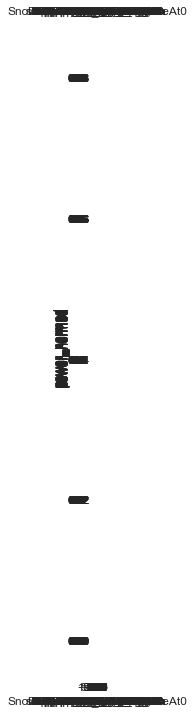

In [19]:
plt.figure()
#figsize=(20, 15)
features=Data1.loc[:, Data1.columns != 'power_normed']
#features =Data1.loc[:, Data1.columns != 'power_normed']
target = Data1['power_normed']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = Data1[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('power_normed')

In [ ]:
#corr.Data1.corr()
corr.shape

In [20]:
#corr=corr.drop('power_normed', axis=1)

### Drop one of the correlated features:
we compare the correlation between features and remove one of two features that have a correlation higher than 0.9 , increase this parammeters will not drop much correlated columns 

In [59]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = Data1.columns[columns]
data = Data1[selected_columns]

In [60]:
len(data.columns)

28

In [61]:
data.isnull().sum();

## Selecting columns based on p-value

In [62]:
selected_columns = selected_columns.values
import statsmodels.formula.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns

In [63]:
SL = 0.05
data_modeled, selected_columns = backwardElimination(data.values, Data1.iloc[:,-1].values, SL, selected_columns)

In [64]:
data.head(2)

,time_idx,hour_of_day,hour_of_day_cos,hour_of_day_sin,month_of_year,month_of_year_cos,month_of_year_sin,season_of_year_sin,sunposition_thetaZ,sunposition_extraTerr,...,RelativeHumidityAt950,SnowDensityAt0,SnowDepthAt0,SnowfallPlusStratiformSurfaceAt0,SurfacePressureAt0,TotalCloudCoverAt0,LowerWindSpeed,LowerWindDirection,LowerWindDirectionMath,UpperWindDirectionMath
0,1.0,0.000000,1.000000,0.000000,0.909091,0.017332,0.258819,0.0,1.0,3.654783e-18,...,0.899810,9.062803e-08,0.0,3.994744e-19,0.314882,0.96875,0.294080,0.558633,0.190752,0.172559
1,2.0,0.142857,0.957824,0.399332,0.909091,0.017332,0.258819,0.0,1.0,3.659645e-18,...,0.884296,9.062803e-08,0.0,3.994744e-19,0.231609,1.00000,0.399157,0.531501,0.217852,0.204424


In [65]:
result = pd.DataFrame()
result['power_normed'] = Data1.iloc[:,-1]

In [66]:
result.head(5)

,power_normed
0,0.000000
1,0.000000
2,0.000000
3,0.035185
4,0.120988


In [67]:
data_final = pd.DataFrame(data = data_modeled, columns = selected_columns)

In [68]:
data_final.head(4)

,hour_of_day,hour_of_day_cos,hour_of_day_sin,month_of_year,month_of_year_cos,month_of_year_sin,season_of_year_sin,sunposition_thetaZ,sunposition_extraTerr,Albedo,...,TemperatureAt0,PotentialVorticityAt1000,PotentialVorticityAt950,RelativeHumidityAt1000,SnowDepthAt0,SnowfallPlusStratiformSurfaceAt0,SurfacePressureAt0,TotalCloudCoverAt0,LowerWindSpeed,LowerWindDirection
0,0.000000,1.000000,0.000000,0.909091,0.017332,0.258819,0.0,1.000000,3.654783e-18,0.167936,...,0.426538,0.457604,0.211843,0.847222,0.0,3.994744e-19,0.314882,0.968750,0.294080,0.558633
1,0.142857,0.957824,0.399332,0.909091,0.017332,0.258819,0.0,1.000000,3.659645e-18,0.167554,...,0.434919,0.465380,0.257749,0.833333,0.0,3.994744e-19,0.231609,1.000000,0.399157,0.531501
2,0.285714,0.838278,0.732544,0.909091,0.017332,0.258819,0.0,1.000000,3.664501e-18,0.167554,...,0.399884,0.529615,0.255517,0.756944,0.0,3.994744e-19,0.231200,1.000000,0.410575,0.623444
3,0.428571,0.661157,0.944463,0.909091,0.017332,0.258819,0.0,0.708461,3.652606e-01,0.167554,...,0.406052,0.461020,0.224923,0.743056,0.0,3.994744e-19,0.248368,0.976562,0.581901,0.669254


In [69]:
result.head(5)

,power_normed
0,0.000000
1,0.000000
2,0.000000
3,0.035185
4,0.120988


In [70]:
x_train, x_test, y_train, y_test = train_test_split(data_final.values, result.values, test_size = 0.2)

In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(data_final.values, result.values, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(4973, 22)
(1244, 22)
(4973, 1)
(1244, 1)


In [72]:
from sklearn.preprocessing import MinMaxScaler 
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
#linreg=LinearRegression().fit(X_train_scaled,Y_train)


In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lin_model = LinearRegression()

In [74]:
lin_model.fit(X_train_scaled, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [75]:
# model evaluation for training set
y_train_predict = lin_model.predict(X_train_scaled)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
print(len(Y_train))
print(len(y_train_predict))

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test_scaled)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
print(len(X_test_scaled))
print(len(y_test_predict))

r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

4973
4973
The model performance for training set
--------------------------------------
RMSE is 0.07974456627929563
R2 score is 0.8041638906860434


1244
1244
The model performance for testing set
--------------------------------------
RMSE is 0.07984640253280739
R2 score is 0.7829443974240691


In [76]:
#To retrieve the intercept:
print(lin_model.intercept_)
#For retrieving the slope:
print(lin_model.coef_)

[1.0404816]
[[-0.55168544 -0.50731311  0.06210548  0.02992731  0.04023132  0.04266546
  -0.02868895 -0.49483883 -0.1305523  -0.17667566  0.02716556 -0.98724315
   1.2459666   0.02477836 -0.08266024  0.12034448  0.12824844  0.04392994
   0.04176471 -0.0499985  -0.13045844  0.01406067]]


In [77]:
## Score of accurracy 

In [78]:
print(lin_model.score(X_test_scaled,Y_test))

0.7829443974240691


In [79]:
len(Y_test)

1244

In [80]:
len(y_test_predict)

1244

## Mean Absolute Error (MAE)
is the mean of the absolute value of the errors

In [81]:
# calculate MAE using scikit-learn
from sklearn import metrics
print(metrics.mean_absolute_error(y_test_predict, Y_test))

0.057211256780963775


## Mean Squared Error (MSE) is the mean of the squared errors:

In [82]:
# calculate MSE using scikit-learn
print(metrics.mean_squared_error(y_test_predict, Y_test))

0.006375447997431111


## Root Mean Squared Error (RMSE)
is the square root of the mean of the squared errors

In [83]:
print(np.sqrt(metrics.mean_squared_error(y_test_predict, Y_test)))

0.07984640253280739


## Here the actual values of target and predicted values 

In [84]:
df2 = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': y_test_predict.flatten()})

In [85]:
df2.head(15)

,Actual,Predicted
0,0.733333,0.487205
1,0.000412,-0.007411
2,0.189918,0.375318
3,0.000000,-0.038714
4,0.025514,0.089676
5,0.305350,0.262303
6,0.009877,0.062994
7,0.241358,0.227418
8,0.617078,0.417200
9,0.004115,0.024998


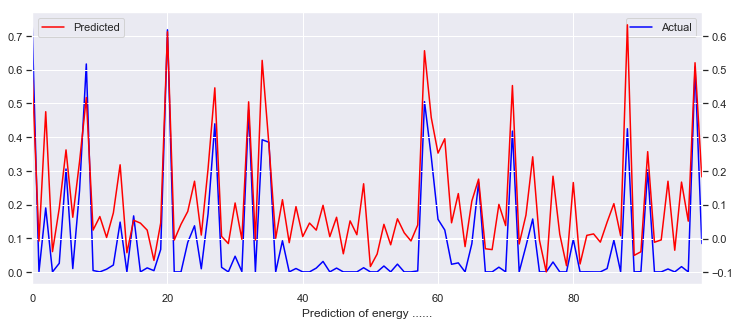

In [86]:

plt.figure(figsize=(12,5))
plt.xlabel('Prediction of energy ......')

ax1 = df2.Actual[0:100].plot(color='blue', grid=True, label='Actual')
ax2 = df2.Predicted[0:100].plot(color='red', grid=True, secondary_y=True, label='Predicted')

ax1.legend(loc=1)
ax2.legend(loc=2)

plt.show()


## Scatter plot of actual and prediction 

In [88]:
#plt.scatter(df2['Actual'],df2['Predicted'])